In [11]:
import tensorflow as tf 
from tensorflow.keras import models, layers  
import matplotlib.pyplot as plt 

In [12]:
IMAGE_SIZE= 256 
BATCH_SIZE= 32 
CHANNELS=3  
EPOCHS = 50 

In [13]:
dataset= tf.keras.preprocessing.image_dataset_from_directory ( "PlantVillage" , shuffle = True ,  image_size= (IMAGE_SIZE,IMAGE_SIZE), 
                                                     batch_size=BATCH_SIZE )


Found 2152 files belonging to 3 classes.


In [14]:
class_names= dataset.class_names 
class_names 


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [15]:
len(dataset)

68

In [16]:
for image_batch , label_batch in dataset.take(1) : 
    print (image_batch.shape) 
    print (label_batch.numpy()) 
    print (image_batch[0].numpy() )

(32, 256, 256, 3)
[0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 2 1 1 0 1 0]
[[[165. 168. 185.]
  [165. 168. 185.]
  [171. 174. 191.]
  ...
  [ 89.  86. 105.]
  [ 77.  74.  93.]
  [121. 118. 137.]]

 [[166. 169. 186.]
  [163. 166. 183.]
  [165. 168. 185.]
  ...
  [ 99.  96. 115.]
  [160. 157. 176.]
  [101.  98. 117.]]

 [[171. 174. 191.]
  [166. 169. 186.]
  [166. 169. 186.]
  ...
  [134. 131. 150.]
  [106. 103. 122.]
  [123. 120. 139.]]

 ...

 [[145. 146. 164.]
  [147. 148. 166.]
  [152. 153. 171.]
  ...
  [121. 116. 136.]
  [149. 144. 164.]
  [ 97.  92. 112.]]

 [[151. 152. 170.]
  [147. 148. 166.]
  [146. 147. 165.]
  ...
  [108. 103. 123.]
  [131. 126. 146.]
  [124. 119. 139.]]

 [[175. 176. 194.]
  [164. 165. 183.]
  [156. 157. 175.]
  ...
  [117. 112. 132.]
  [118. 113. 133.]
  [106. 101. 121.]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


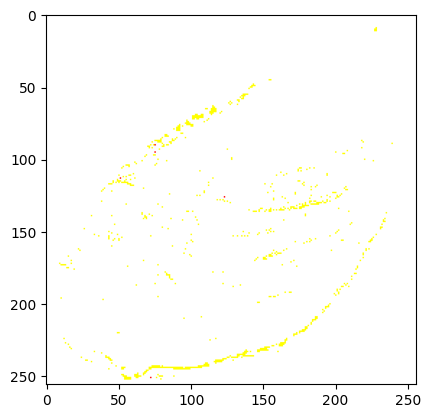

In [17]:
for image_batch , label_batch in dataset.take(1) :   
    
    plt.imshow(image_batch[0].numpy())



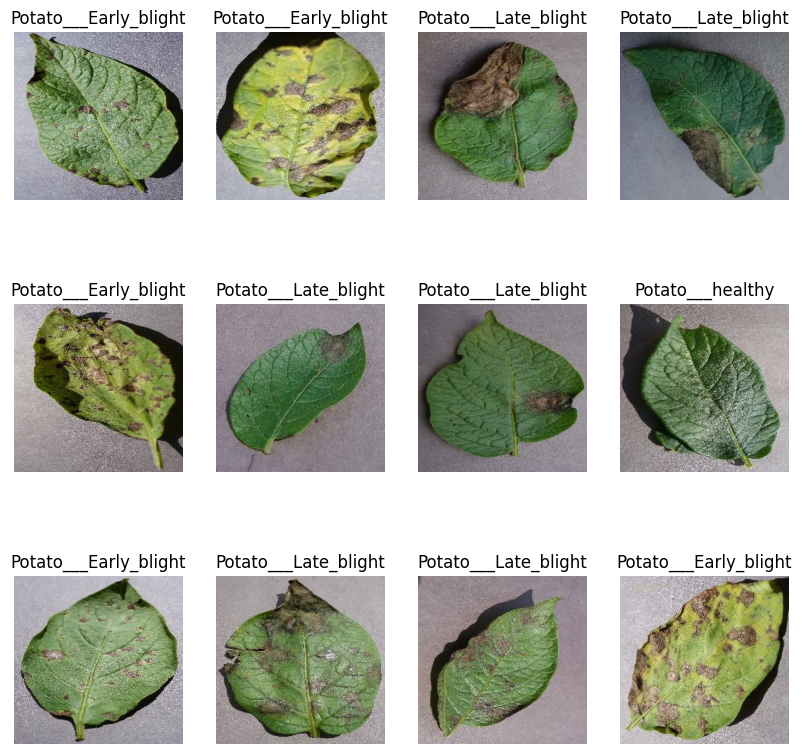

In [18]:


plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12): 
        ax= plt.subplot(3,4,i+1) 
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

plt.show()


In [19]:
80 % ==> training 
20 % ==> 10% validation, 10% test  


SyntaxError: invalid syntax (4006128306.py, line 1)

In [ ]:
train_size=0.8  
len(dataset)*train_size 
#calculating 80% of the whole data set to know how much to train 

In [20]:
train_ds= dataset.take(54)  
len(train_ds)
#take 54  batches out of 68  at once for training (each batch is 32 samples )

54

In [21]:
 test_ds= dataset.skip(54) 
len(test_ds)

14

In [22]:
val_size=0.1 
len(dataset)*val_size

6.800000000000001

In [23]:
val_ds=test_ds.take(6)  
len(val_ds)  


6

In [24]:
test_ds=test_ds.skip(6)  
len(test_ds) 

8

In [25]:
def get_dataset_partitions_tf(ds, train_split=0.8, test_split=0.1, val_split= 0.1 ,shuffle=True , shuffle_size=10000):     
        ds_size= len(ds)  
        if shuffle : 
          ds=ds.shuffle(shuffle_size, seed=12)
        train_size = int(train_split* ds_size )
        val_size=int(val_split* ds_size )  
        train_ds=ds.take(train_size ) 
        val_ds= ds.skip(train_size).take(val_size)  
        test_ds = ds.skip (train_size).skip(val_size )
        return train_ds, test_ds, val_ds 
    

In [26]:
train_ds, test_ds, val_ds = get_dataset_partitions_tf(dataset) 

In [27]:
len(train_ds)

54

In [28]:
len(val_ds)


6

In [29]:
len(test_ds)

8

In [30]:
 train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
 test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
 val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
   resize_and_rescale = tf.keras.Sequential ([   
      layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE), 
     layers.experimental.preprocessing.Rescaling(1.0/255) 
]) 

In [32]:
data_augmentation = tf.keras.Sequential ([   
      layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), 
     layers.experimental.preprocessing.RandomRotation (0.2) 
]) 

In [33]:
input_shape= ( BATCH_SIZE , IMAGE_SIZE,IMAGE_SIZE, CHANNELS ) 
n_classes=3 
model=models.Sequential([ 
    resize_and_rescale, 
    data_augmentation , 
    layers.Conv2D(32, (3,3),activation = 'relu' ,  input_shape = input_shape ), 
    layers.MaxPooling2D((2,2) ),  
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])  
model.build ( input_shape = input_shape) 

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [35]:
model.compile( 
optimizer = 'adam' , 
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False ) , 
    metrics=['accuracy'] 
)

In [36]:
history= model. fit( 
    train_ds , 
    epochs= EPOCHS,  
    
    batch_size= BATCH_SIZE,    
    verbose=1, 
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 101s 2s/step - loss: 0.8535 - accuracy: 0.5498 - val_loss: 0.5546 - val_accuracy: 0.7812
Epoch 2/50
54/54 [==============================] - 79s 1s/step - loss: 0.4736 - accuracy: 0.7836 - val_loss: 0.3495 - val_accuracy: 0.8802
Epoch 3/50
54/54 [==============================] - 77s 1s/step - loss: 0.3264 - accuracy: 0.8634 - val_loss: 0.3135 - val_accuracy: 0.9115
Epoch 4/50
54/54 [==============================] - 88s 2s/step - loss: 0.2861 - accuracy: 0.8877 - val_loss: 0.3569 - val_accuracy: 0.8021
Epoch 5/50
54/54 [==============================] - 84s 2s/step - loss: 0.2584 - accuracy: 0.8970 - val_loss: 0.2053 - val_accuracy: 0.9167
Epoch 6/50
54/54 [==============================] - 79s 1s/step - loss: 0.2342 - accuracy: 0.9086 - val_loss: 0.1631 - val_accuracy: 0.9427
Epoch 7/50
54/54 [==============================] - 79s 1s/step - loss: 0.2179 - accuracy: 0.9167 - val_loss: 0.1794 - val_accuracy: 0.9375
Epoch 8/50
54/54 [=

In [37]:
scores= model.evaluate(test_ds)

8/8 [==============================] - 4s 397ms/step - loss: 0.0096 - accuracy: 1.0000


In [38]:
scores

[0.00955704040825367, 1.0]

In [39]:
history

In [40]:
history.params


{'verbose': 1, 'epochs': 50, 'steps': 54}

In [41]:
history.history .keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

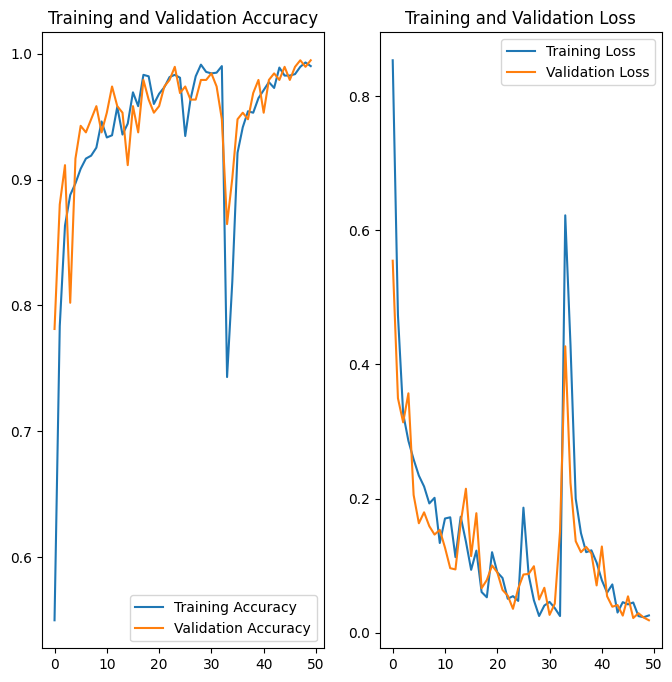

In [43]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
np.argmax([9.9998355e-01 ,1.6481383e-05, 2.9887325e-11])

0

first image to predict 
 first image actual label :  Potato___Early_blight
1/1 [==============================] - 1s 533ms/step
[6.101084e-06 4.575549e-03 9.954183e-01]
predicted label : Potato___healthy


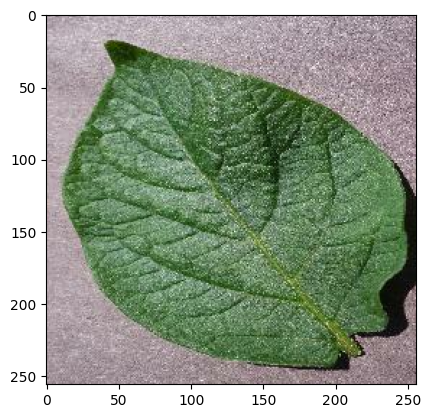

In [45]:
import numpy as np 
for images_batch , labels_batch in test_ds.take(1) : 
   first_image= images_batch[0].numpy().astype('uint8') 
first_label= label_batch[0]  
print ("first image to predict ") 
plt.imshow(first_image)  
print(" first image actual label : " , class_names[first_label] )  
batch_prediction = model.predict(images_batch) 
print(batch_prediction[0])  
print( "predicted label :" , class_names[np.argmax(batch_prediction[0])])


In [47]:
for images_batch, labels_batch in test_ds.take(1) : 
    print(images_batch[0].numpy())

[[[156. 143. 152.]
  [167. 154. 163.]
  [160. 147. 156.]
  ...
  [209. 194. 201.]
  [163. 148. 155.]
  [139. 124. 131.]]

 [[159. 146. 155.]
  [170. 157. 166.]
  [162. 149. 158.]
  ...
  [148. 133. 140.]
  [183. 168. 175.]
  [158. 143. 150.]]

 [[166. 153. 162.]
  [121. 108. 117.]
  [140. 127. 136.]
  ...
  [164. 149. 156.]
  [161. 146. 153.]
  [186. 171. 178.]]

 ...

 [[128. 105. 115.]
  [147. 124. 134.]
  [138. 115. 125.]
  ...
  [130. 109. 116.]
  [111.  90.  97.]
  [156. 135. 142.]]

 [[140. 117. 127.]
  [154. 131. 141.]
  [144. 121. 131.]
  ...
  [127. 106. 113.]
  [124. 103. 110.]
  [132. 111. 118.]]

 [[140. 117. 127.]
  [144. 121. 131.]
  [125. 102. 112.]
  ...
  [147. 126. 133.]
  [130. 109. 116.]
  [123. 102. 109.]]]


In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 47ms/step


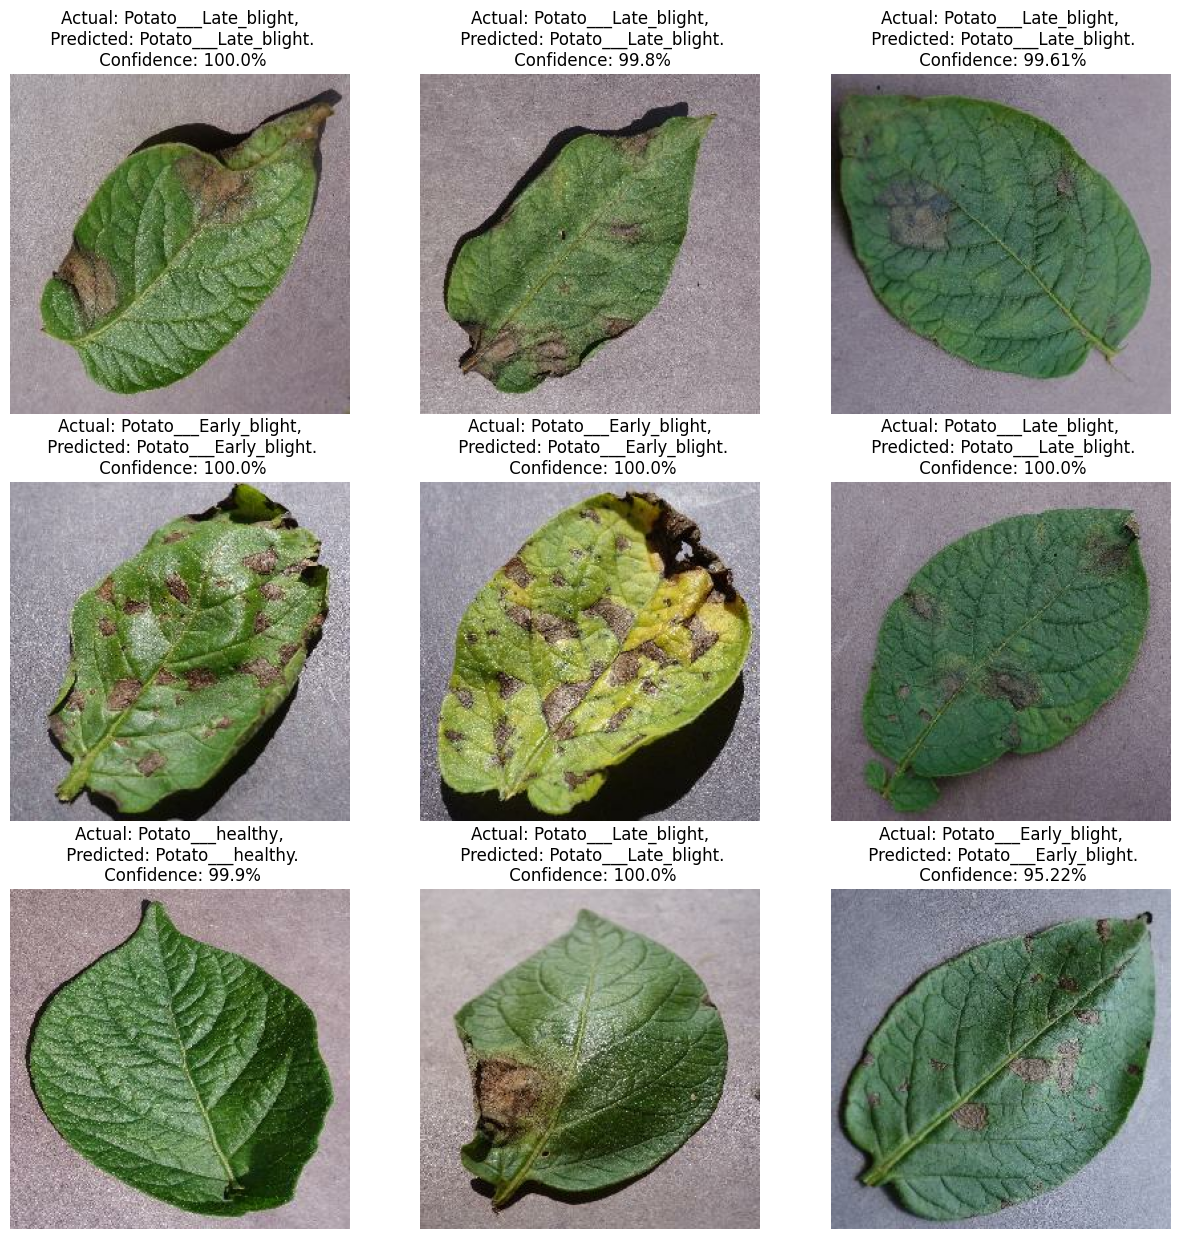

In [65]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")


In [60]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
